<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Unsupervised_and_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend --upgrade

In [172]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Example 1

In [112]:
data_beakery = pd.read_csv('/content/drive/MyDrive/Datasets/dados-padaria.csv')
data_beakery.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [113]:
data_beakery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [114]:
data_beakery.describe()

,TransactionNo
count,20507.000000
mean,4976.202370
std,2796.203001
min,1.000000
25%,2552.000000
50%,5137.000000
75%,7357.000000
max,9684.000000


In [115]:
trans = []
for i in data_beakery.TransactionNo.unique():
    list_t = list(set(data_beakery[data_beakery.TransactionNo == i]['Items']))
    trans.append(list_t)

In [116]:
trans[0:5]

[['Bread'],
 ['Scandinavian'],
 ['Jam', 'Cookies', 'Hot chocolate'],
 ['Muffin'],
 ['Coffee', 'Bread', 'Pastry']]

In [117]:
# association rules
te = TransactionEncoder()
trans_te = te.fit(trans).transform(trans)
np.unique(trans_te, return_counts=True)

(array([False,  True]), array([870823,  18887]))

In [118]:
data_trans = pd.DataFrame(trans_te, columns=te.columns_)
data_trans

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [119]:
# apriori algorithm
items_freq_apriori = apriori(data_trans, use_colnames=True, min_support=0.02)\
        .sort_values(['support'], ascending=False)

In [120]:
rule_apriori = association_rules(items_freq_apriori, metric='confidence', min_threshold=0.5)
rule_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
1,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
2,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
3,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
4,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
5,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
6,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
7,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919


## Example 2

In [121]:
data_beans = pd.read_excel('/content/drive/MyDrive/Datasets/dados_feijao.xlsx', index_col=0)
data_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [122]:
data_beans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.8 MB


In [123]:
data_beans.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [124]:
X = data_beans.iloc[:,:].values
X

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        3.14728917e-03, 8.34222388e-01, 9.98723889e-01],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        3.56362371e-03, 9.09850506e-01, 9.98430331e-01],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        3.04773322e-03, 8.25870617e-01, 9.99066137e-01],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        1.88827064e-03, 6.76884164e-01, 9.96767264e-01],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        1.85202548e-03, 6.68236684e-01, 9.95222420e-01],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        1.63981171e-03, 6.16220592e-01, 9.98179623e-01]])

In [125]:
scaler_std = StandardScaler()
scaler_min = MinMaxScaler()
X_norm_std = scaler_std.fit_transform(X)
X_norm_min = scaler_min.fit_transform(X)

In [126]:
X_norm_std.min(), X_norm_std.max()

(-14.569454205823972, 7.036140663593106)

In [127]:
X_norm_min.min(), X_norm_min.max()

(0.0, 1.0)

### K-Means

In [128]:
kmeans = KMeans(n_clusters=7, random_state=42)
label_std = kmeans.fit_predict(X_norm_std)
label_min = kmeans.fit_predict(X_norm_min)

In [129]:
label_std[:5], label_min[:5]

(array([4, 4, 4, 4, 4], dtype=int32), array([4, 4, 4, 4, 4], dtype=int32))

In [130]:
# elbow method
wcss_std = []
wcss_min = []

for i in range(2,11):
    kmeans_e_std = KMeans(n_clusters=i, random_state=42)
    kmeans_e_min = KMeans(n_clusters=i, random_state=42)

    kmeans_e_std.fit(X_norm_std)
    kmeans_e_min.fit(X_norm_min)

    wcss_std.append(kmeans_e_std.inertia_)
    wcss_min.append(kmeans_e_min.inertia_)

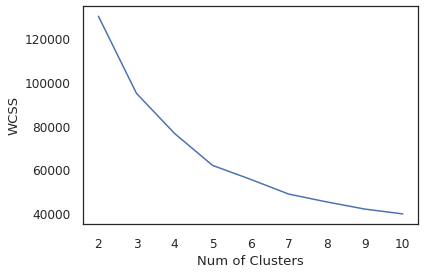

In [131]:
plt.plot(range(2,11), wcss_std)
# plt.plot(range(2,11), wcss_min)
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS');

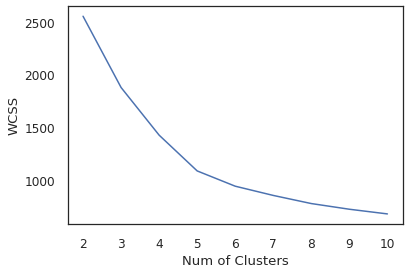

In [132]:
# plt.plot(range(2,11), wcss_std)
plt.plot(range(2,11), wcss_min)
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS');

Using StanderScaler


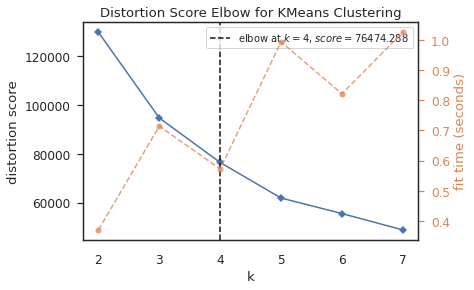


Using MinMaxScaler


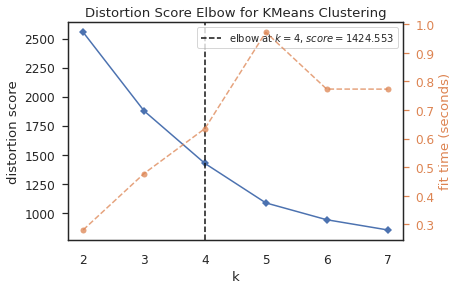

In [133]:
print('Using StanderScaler')
kmeans_elbow_std = KMeans(random_state=42)

graph = KElbowVisualizer(kmeans_elbow_std, k=(2,8))
graph.fit(X_norm_std)
graph.show()

print('\nUsing MinMaxScaler')
kmeans_elbow_min = KMeans(random_state=42)

graph = KElbowVisualizer(kmeans_elbow_min, k=(2,8))
graph.fit(X_norm_min)
graph.show();

In [134]:
# runing again
kmeans = KMeans(n_clusters=4, random_state=42)
label_std = kmeans.fit_predict(X_norm_std)
label_min = kmeans.fit_predict(X_norm_min)

In [149]:
def vizualize(X_norm, labels):
    sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)
    plt.scatter(X_norm[:,0], y=X_norm[:,2], c=labels, cmap='winter')
    # plt.scatter(labels.cluster_centers_[:,0], labels.cluster_centers_[:,2], s=100, c='red')
    plt.title('K-Means Cluster', fontweight='bold');

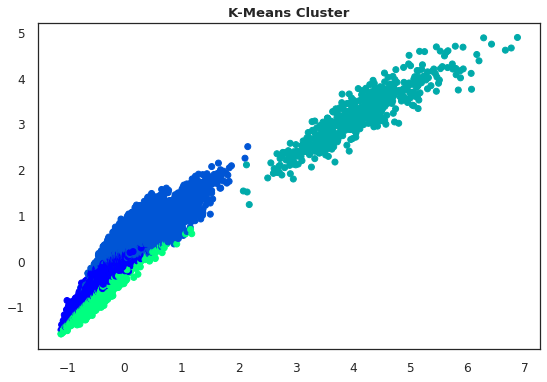

In [140]:
vizualize(X_norm_std, label_std)

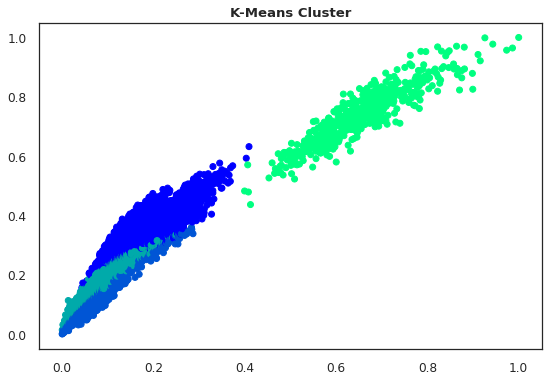

In [141]:
vizualize(X_norm_min, label_min)

## Mean Shift

In [143]:
bw = estimate_bandwidth(X_norm_std)
meanshit_data = MeanShift(bandwidth=bw).fit(X_norm_std)
label_meanshift = meanshit_data.labels_
labels_num = len(np.unique(label_meanshift))
labels_num

4

In [145]:
cluster_centers = meanshit_data.cluster_centers_
cluster_centers

array([[ -0.4789558 ,  -0.57366824,  -0.58841817,  -0.42756736,
         -0.42964784,  -0.28480431,  -0.48084559,  -0.5319751 ,
          0.12248386,   0.32496662,   0.54452886,   0.39271413,
          0.44264794,   0.51777696,   0.37457547,   0.38905475],
       [  4.04202451,   3.35871393,   3.13195302,   3.79875394,
         -0.01871732,   0.20020256,   4.02825102,   3.60773152,
          0.58606303,   0.13478125,  -0.1081938 ,  -0.09017692,
         -2.76073157,  -1.45046936,  -0.12046372,  -0.58259507],
       [ -0.61809068,  -0.18034875,  -0.72145327,  -0.45878373,
         -0.65305572,  -0.43329509,  -0.52986816,  -0.71302349,
         -0.76678946, -14.56945421,  -3.6158641 ,   0.26663429,
          0.73851951,   0.52044111,   0.23016791, -10.85036253],
       [ -0.71296496,   0.24725168,  -0.89407169,  -0.67041047,
         -0.68268286,  -0.47253771,  -0.66549065,  -0.85790121,
         -0.53453744,  -8.69256545,  -6.44620954,   0.49964137,
          0.89810019,   0.85515594,  

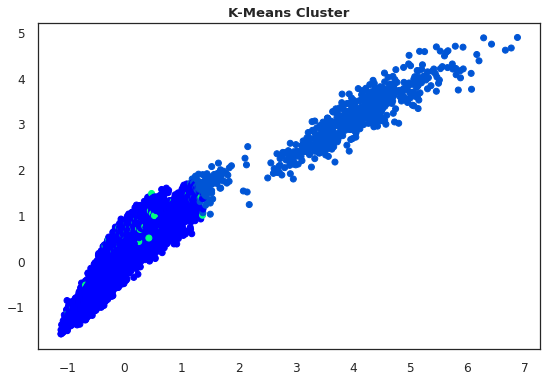

In [150]:
vizualize(X_norm_std, label_meanshift)

## DBScan

In [166]:
dbscan = DBSCAN(eps=1.2, min_samples=6)
dbscan_data = dbscan.fit(X_norm_std)
labels_dbscan = dbscan_data.labels_
labels_dbscan

array([0, 0, 0, ..., 0, 0, 0])

In [167]:
np.unique(labels_dbscan, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]),
 array([  406, 12731,     5,   450,     5,    14]))

In [168]:
labels_num_dbscan = len(np.unique(labels_dbscan))
labels_num_dbscan

6

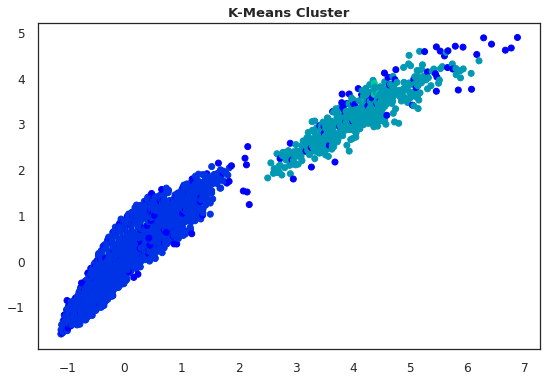

In [169]:
vizualize(X_norm_std, labels_dbscan)

##PCA 

In [173]:
correlation = data_beans.corr()
correlation

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


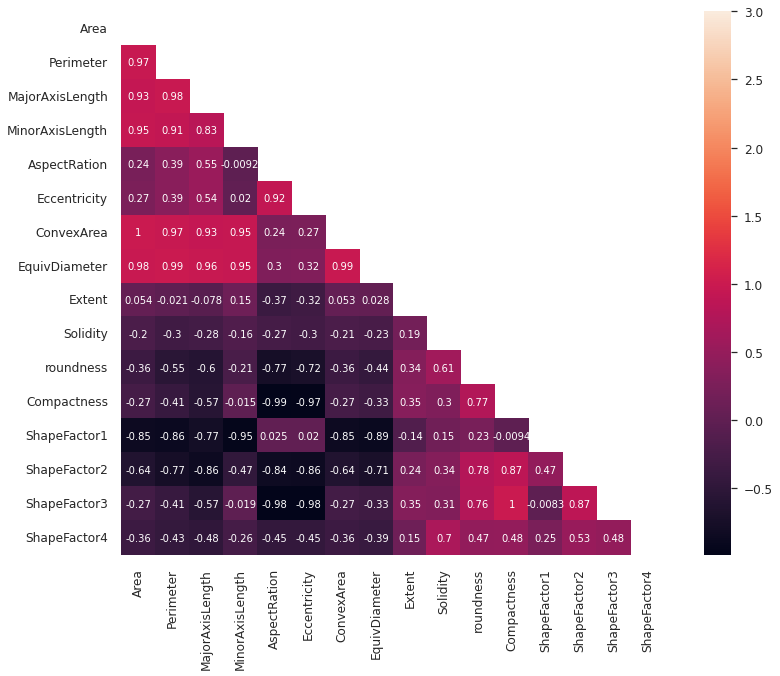

In [174]:
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(14,10))
    ax = sns.heatmap(correlation, mask=mask, vmax=3, square=True, annot=True)

In [178]:
pca = PCA()
pca_data = pca.fit_transform(X_norm_std)
np.set_printoptions(precision=2, suppress=True)
pca.explained_variance_

array([8.88, 4.23, 1.28, 0.82, 0.44, 0.18, 0.11, 0.05, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  ])

In [179]:
var_explained = np.around(pca.explained_variance_ratio_, 2)*100
var_explained

array([55., 26.,  8.,  5.,  3.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

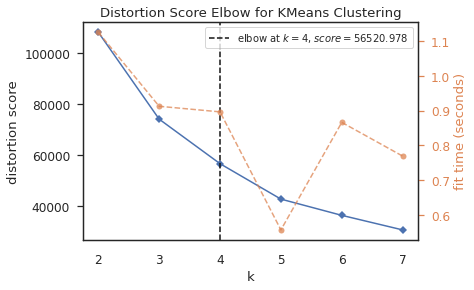

In [180]:
pca_2 = PCA(n_components=3)
pca_data_2 = pca_2.fit_transform(X_norm_std)
kmeans_data_pca_elbow = KMeans(random_state=42)

graph = KElbowVisualizer(kmeans_data_pca_elbow, k=(2,8))
graph.fit(pca_data_2)
graph.show()

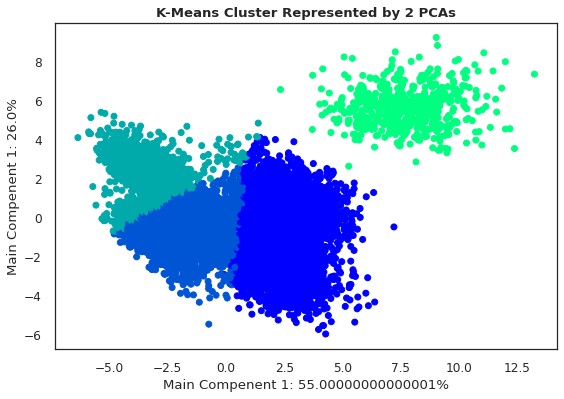

In [187]:
kmean_data_pca = KMeans(n_clusters=4, random_state=42)
labels_kmeans_pca = kmean_data_pca.fit_predict(pca_data_2)

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)
plt.scatter(x=pca_data_2[:,0], y=pca_data_2[:,1], c=labels_kmeans_pca, cmap='winter')
plt.xlabel(f'Main Compenent 1: {var_explained[0]}%')
plt.ylabel(f'Main Compenent 1: {var_explained[1]}%')
plt.title('K-Means Cluster Represented by 2 PCAs', fontweight='bold')
plt.show()